In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 9.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_BASE     = "http://api:8000/api"
RFMS_ENDPOINT = f"{API_BASE}/rfm_segments/"

# Fetch all RFM rows
resp = requests.get(RFMS_ENDPOINT)
resp.raise_for_status()

# Build DataFrame
df_rfm = pd.DataFrame(resp.json())

# Convert date_created back to datetime
df_rfm['date_created'] = pd.to_datetime(df_rfm['date_created'])

df_rfm.head()


,mobile_id,recency_days,frequency,monetary,R_score,F_score,M_score,RFM_score,segment,rfm_id,date_created
0,04a61222-bbf8-48d2-9c71-a196fe26c84e,55,2,321.00,2,1,1,211,Others,1,2025-05-03 19:29:57.342039+00:00
1,065e6038-20e6-48c0-97cc-eb1e8f2ecf7c,33,1,147.66,3,2,3,323,Others,2,2025-05-03 19:29:57.368998+00:00
2,0b432599-6244-4df2-affd-48cd42b32a75,51,1,126.36,2,2,3,223,Others,3,2025-05-03 19:29:57.385761+00:00
3,0cba5857-9f1a-47fd-b836-c5418bcbb2d9,33,1,169.61,3,3,2,332,Loyal Customers,4,2025-05-03 19:29:57.404813+00:00
4,10f11525-3043-4a10-ab82-e7deff8d7e4b,41,2,157.66,3,1,3,313,Others,5,2025-05-03 19:29:57.426479+00:00


In [3]:
print(df_rfm['segment'].value_counts())

segment
Others              41
Frequent Buyers     31
Recent Customers    24
Loyal Customers      4
Name: count, dtype: int64


<Axes: >

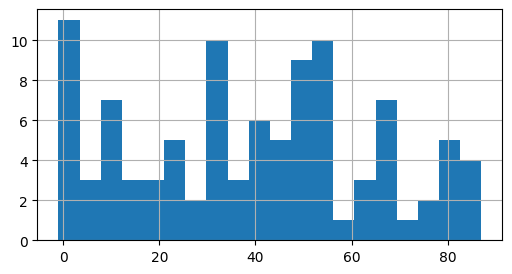

In [4]:
df_rfm['recency_days'].hist(bins=20, figsize=(6,3))

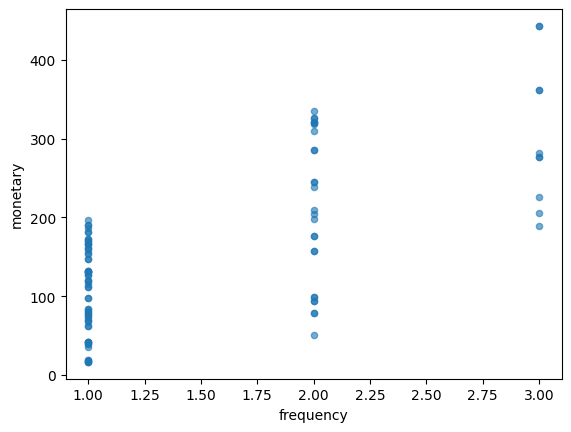

In [5]:
df_rfm.plot.scatter(x='frequency', y='monetary', alpha=0.6);

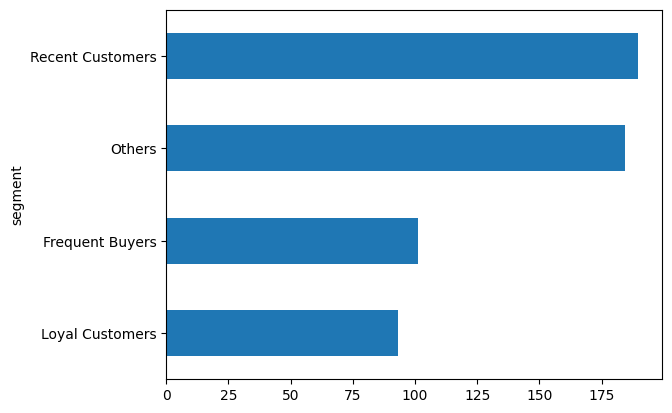

In [6]:
df_rfm.groupby('segment')['monetary'].mean().sort_values().plot.barh();

In [1]:
API_BASE     = "http://api:8000/api"
RFMS_ENDPOINT = f"{API_BASE}/rfm_segments/"

# Fetch all RFM rows
resp = requests.get(RFMS_ENDPOINT)
resp.raise_for_status()

# Build DataFrame
df_rfm = pd.DataFrame(resp.json())

# Convert date_created back to datetime
df_rfm['date_created'] = pd.to_datetime(df_rfm['date_created'])

df_rfm.head()


,mobile_id,recency_days,frequency,monetary,R_score,F_score,M_score,RFM_score,segment,rfm_id,date_created
0,04a61222-bbf8-48d2-9c71-a196fe26c84e,55,2,321.00,2,1,1,211,Others,1,2025-05-03 19:29:57.342039+00:00
1,065e6038-20e6-48c0-97cc-eb1e8f2ecf7c,33,1,147.66,3,2,3,323,Others,2,2025-05-03 19:29:57.368998+00:00
2,0b432599-6244-4df2-affd-48cd42b32a75,51,1,126.36,2,2,3,223,Others,3,2025-05-03 19:29:57.385761+00:00
3,0cba5857-9f1a-47fd-b836-c5418bcbb2d9,33,1,169.61,3,3,2,332,Loyal Customers,4,2025-05-03 19:29:57.404813+00:00
4,10f11525-3043-4a10-ab82-e7deff8d7e4b,41,2,157.66,3,1,3,313,Others,5,2025-05-03 19:29:57.426479+00:00


In [2]:
print(df_rfm['segment'].value_counts())

segment
Others              41
Frequent Buyers     31
Recent Customers    24
Loyal Customers      4
Name: count, dtype: int64


<Axes: >

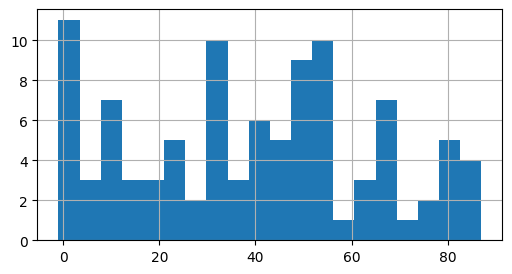

In [3]:
df_rfm['recency_days'].hist(bins=20, figsize=(6,3))

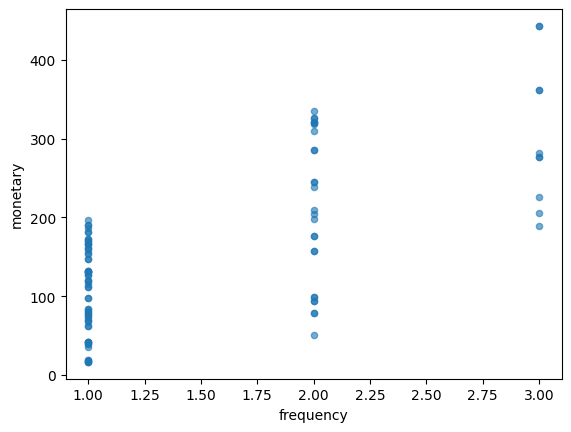

In [4]:
df_rfm.plot.scatter(x='frequency', y='monetary', alpha=0.6);

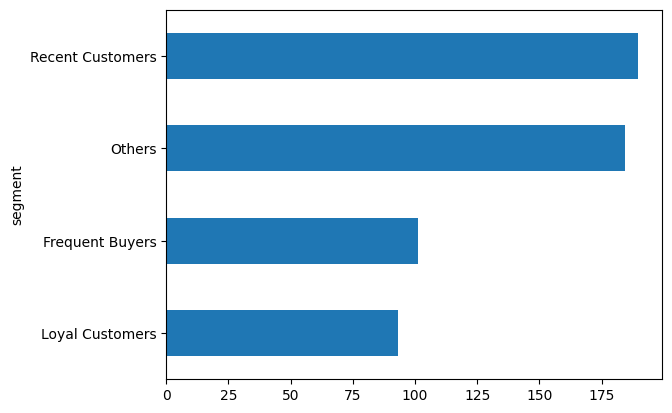

In [5]:
df_rfm.groupby('segment')['monetary'].mean().sort_values().plot.barh();

In [7]:
RECS_EP           = f"{API_BASE}/menu_recommendations/"
ITEMS_EP          = f"{API_BASE}/dim_menu_items/"
DAYTIMES_EP       = f"{API_BASE}/dim_menu_daytimes/"

# 1) fetch
df_recs   = pd.DataFrame(requests.get(RECS_EP).json())
df_items  = pd.DataFrame(requests.get(ITEMS_EP).json())
df_slots  = pd.DataFrame(requests.get(DAYTIMES_EP).json())

# 2) merge in names and labels
df = (
    df_recs
      .merge(df_items[['item_id','menu_item_name']], 
             left_on='menu_item_id', right_on='item_id')
      .merge(df_slots[['daytime_id','daytime_label']], on='daytime_id')
)


In [8]:
print("Slots covered:", df['daytime_label'].nunique())
print(df['daytime_label'].value_counts(), "\n")

Slots covered: 11
daytime_label
Early Breakfast            10
Standard Breakfast         10
Late Breakfast / Brunch    10
Lunch                      10
Late Lunch                 10
Afternoon Tea / Snack      10
Early Dinner               10
Standard Dinner            10
Late Dinner / Supper       10
Midnight Snack              5
Closed / No Service         5
Name: count, dtype: int64 



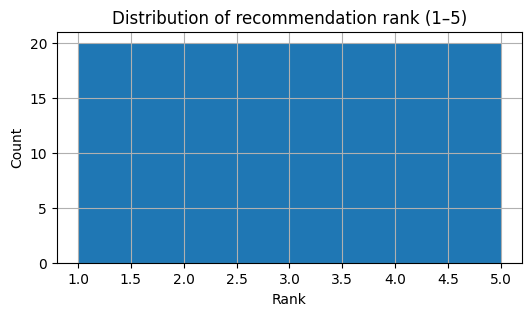

In [9]:
plt.figure(figsize=(6,3))
df['rank'].hist(bins=5)
plt.title("Distribution of recommendation rank (1–5)")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

In [10]:
RECS_EP           = f"{API_BASE}/menu_recommendations/"
ITEMS_EP          = f"{API_BASE}/dim_menu_items/"
DAYTIMES_EP       = f"{API_BASE}/dim_menu_daytimes/"

# 1) fetch
df_recs   = pd.DataFrame(requests.get(RECS_EP).json())
df_items  = pd.DataFrame(requests.get(ITEMS_EP).json())
df_slots  = pd.DataFrame(requests.get(DAYTIMES_EP).json())

# 2) merge in names and labels
df = (
    df_recs
      .merge(df_items[['item_id','menu_item_name']], 
             left_on='menu_item_id', right_on='item_id')
      .merge(df_slots[['daytime_id','daytime_label']], on='daytime_id')
)


In [11]:
print("Slots covered:", df['daytime_label'].nunique())
print(df['daytime_label'].value_counts(), "\n")

Slots covered: 11
daytime_label
Early Breakfast            10
Standard Breakfast         10
Late Breakfast / Brunch    10
Lunch                      10
Late Lunch                 10
Afternoon Tea / Snack      10
Early Dinner               10
Standard Dinner            10
Late Dinner / Supper       10
Midnight Snack              5
Closed / No Service         5
Name: count, dtype: int64 



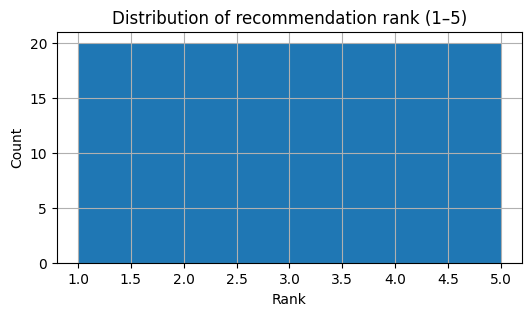

In [12]:
plt.figure(figsize=(6,3))
df['rank'].hist(bins=5)
plt.title("Distribution of recommendation rank (1–5)")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

Top 10 most-recommended items:
 menu_item_name
Tomato Basil Soup      8
Granola Bar            8
Caesar Salad           7
Quinoa Salad           7
Beetroot Juice         6
Blueberry Muffin       6
Sparkling Water        5
Cappuccino             5
Chicken Noodle Soup    5
Pancakes               4
Name: rank, dtype: int64 



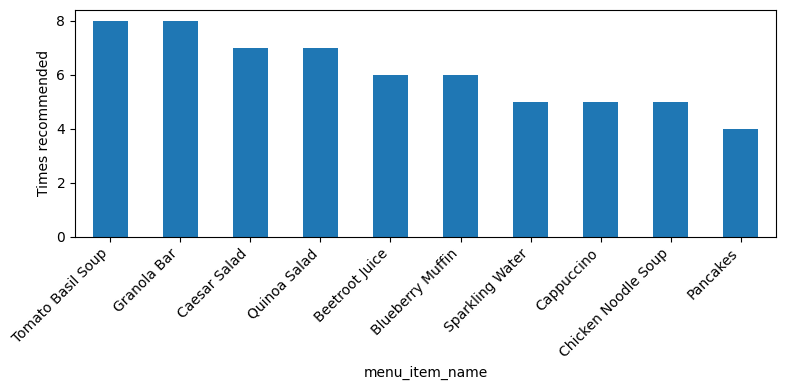

In [14]:
top_items = (
    df.groupby('menu_item_name')['rank']
      .count()
      .sort_values(ascending=False)
      .head(10)
)
print("Top 10 most-recommended items:\n", top_items, "\n")

plt.figure(figsize=(8,4))
top_items.plot.bar()
plt.ylabel("Times recommended")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

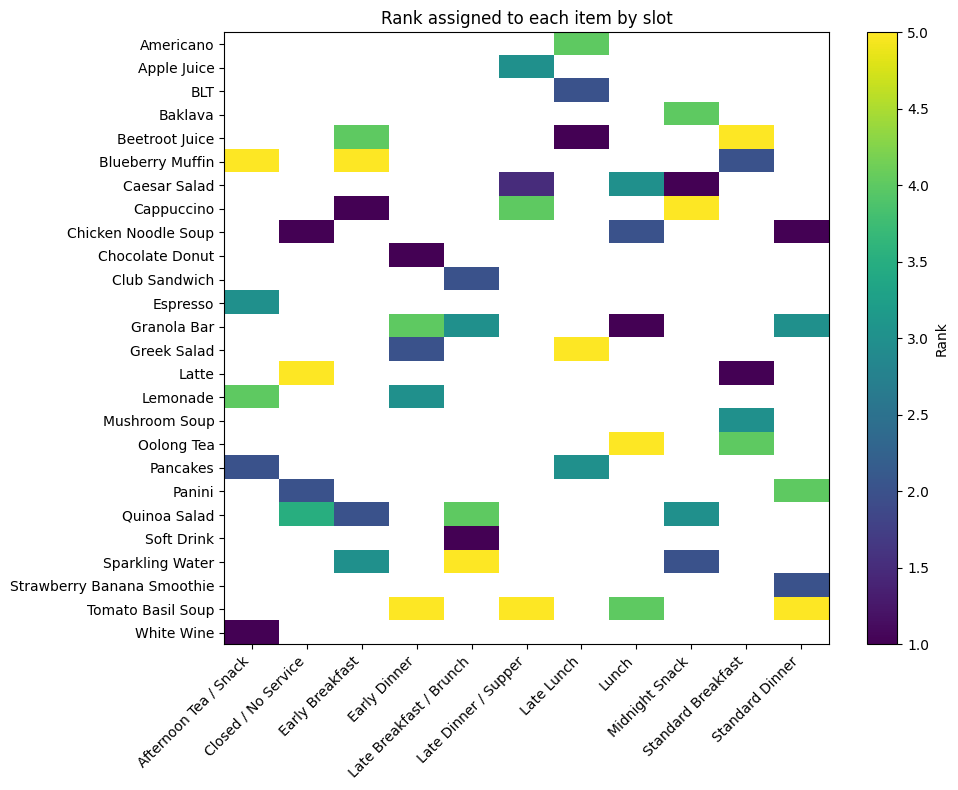

In [17]:
# 6) heatmap of which items get which rank per slot
pivot = df.pivot_table(
    index='menu_item_name',
    columns='daytime_label',
    values='rank',
    aggfunc='mean'  # you can also use 'min' or 'first' if you prefer
)

plt.figure(figsize=(10,8))
plt.imshow(pivot, aspect='auto', interpolation='none')
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha='right')
plt.colorbar(label='Rank')
plt.title("Rank assigned to each item by slot")
plt.tight_layout()
plt.show()
